# Predict the Stock Market 

In [1]:
import pandas as pd

In [2]:
import yfinance as yf

In [3]:
# pip install yfinance

In [4]:
from plotly import graph_objs as go
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
from googlesearch import search
from yfinance import *

def name_convert(self):
    searchval = 'yahoo finance '+self
    link = []
    searchs = search(searchval, tld='es', lang='es', stop=5)
    for url in searchs:
        link.append(url)
    link = str(link[0])
    link=link.split("/")
    if link[-1]=='':
        ticker=link[-2]
    else:
        x=link[-1].split('=')
        ticker=x[-1]
    return ticker

company_name=input("Enter a company name: ")
company=name_convert(company_name)
x = company.split(".")
# print(x)
try:
    if(x[1]=='BO'):
        company = x[0]+'.'+'NS'
        print(company)
except:
    print(company)
# print(company)
cur = yf.Ticker(company)
details = cur.info
currency = details['currency']
try:
    desc = details['longBusinessSummary']
except:
    try:
        desc = details['description']
    except:
        desc=' '

if desc!=' ':
    print("Description: ")
    print(desc)
print("Currency: ",currency)

Enter a company name: Mahindra
Description: 
Mahindra & Mahindra Limited provides mobility products and farm solutions in India and internationally. The company operates through Automotive, Farm Equipment, Financial Services, Hospitality, Real Estate, and Others segments. It offers aircrafts, and airframe parts and assemblies; passenger and commercial vehicles, trucks, buses, vans, cars, utility vehicles, and electric vehicles; personal and commercial watercrafts; motorcycles, scooters, mopeds, and electric two wheelers; construction equipment, such as backhoe loaders under the Mahindra EarthMaster brand; and road construction equipment comprising motor graders under the Mahindra RoadMaster brand. The company also provides land and naval systems, defense electronics, and security consulting services for defense industry; pre-owned car and car services; and farm equipment. In addition, it operates M2All, an e-commerce platform for various portfolio of products; approximately 100 resorts

## Dataframe download

In [6]:
dataframe = yf.download(company, period = '270d', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [7]:
print(currency)
if currency!="INR":
    print("YES")

INR


In [8]:
if currency!="INR":
    import requests
    url = 'https://v6.exchangerate-api.com/v6/d81efaa7bb08ee79f61d3170/latest/'+currency
    response = requests.get(url)
    currency_rate = response.json()
    rate = currency_rate["conversion_rates"]['INR']
    print(rate)
else:
    rate = 1

In [9]:
dataframe.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-06  838.700012  838.700012  822.950012  827.849976  827.849976   
2022-04-07  826.000000  840.299988  822.299988  834.299988  834.299988   
2022-04-08  830.000000  860.650024  827.049988  857.400024  857.400024   
2022-04-11  854.950012  861.349976  846.200012  856.849976  856.849976   
2022-04-12  850.000000  867.400024  843.299988  860.799988  860.799988   

             Volume  
Date                 
2022-04-06  2049292  
2022-04-07  2913537  
2022-04-08  4145522  
2022-04-11  2922901  
2022-04-12  2960592

In [10]:
# dataframe1.tail()

In [11]:
dataframe['Open'] = dataframe['Open'].apply(lambda x: x*rate)
dataframe['High'] = dataframe['High'].apply(lambda x: x*rate)
dataframe['Low'] = dataframe['Low'].apply(lambda x: x*rate)
dataframe['Close'] = dataframe['Close'].apply(lambda x: x*rate)
dataframe['Adj Close'] = dataframe['Adj Close'].apply(lambda x: x*rate)


In [12]:
dataframe = dataframe.drop(['Adj Close'], axis=1)

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2021-03-10 to 2022-04-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    270 non-null    float64
 1   High    270 non-null    float64
 2   Low     270 non-null    float64
 3   Close   270 non-null    float64
 4   Volume  270 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 12.7 KB


In [14]:
# dataframe = dataframe.seti

In [15]:
dataframe.tail()

Open        High         Low       Close   Volume
Date                                                               
2022-04-06  838.700012  838.700012  822.950012  827.849976  2049292
2022-04-07  826.000000  840.299988  822.299988  834.299988  2913537
2022-04-08  830.000000  860.650024  827.049988  857.400024  4145522
2022-04-11  854.950012  861.349976  846.200012  856.849976  2922901
2022-04-12  850.000000  867.400024  843.299988  860.799988  2960592

In [16]:
dataframe = dataframe.reset_index()

In [17]:
dataframe.head()

Date        Open        High         Low       Close   Volume
0 2021-03-10  856.400024  875.000000  849.000000  863.799988  3971353
1 2021-03-12  869.500000  876.200012  844.150024  855.799988  4012449
2 2021-03-15  862.000000  862.000000  824.000000  844.400024  3069303
3 2021-03-16  852.000000  856.500000  840.000000  842.849976  2996797
4 2021-03-17  847.599976  851.349976  833.700012  836.950012  2034583

In [18]:
dataframe = dataframe.round(2)

In [19]:
dataframe.head()

Date   Open    High     Low   Close   Volume
0 2021-03-10  856.4  875.00  849.00  863.80  3971353
1 2021-03-12  869.5  876.20  844.15  855.80  4012449
2 2021-03-15  862.0  862.00  824.00  844.40  3069303
3 2021-03-16  852.0  856.50  840.00  842.85  2996797
4 2021-03-17  847.6  851.35  833.70  836.95  2034583

In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    270 non-null    datetime64[ns]
 1   Open    270 non-null    float64       
 2   High    270 non-null    float64       
 3   Low     270 non-null    float64       
 4   Close   270 non-null    float64       
 5   Volume  270 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 12.8 KB


In [21]:
dataframe.head()

Date   Open    High     Low   Close   Volume
0 2021-03-10  856.4  875.00  849.00  863.80  3971353
1 2021-03-12  869.5  876.20  844.15  855.80  4012449
2 2021-03-15  862.0  862.00  824.00  844.40  3069303
3 2021-03-16  852.0  856.50  840.00  842.85  2996797
4 2021-03-17  847.6  851.35  833.70  836.95  2034583

In [22]:
# dataframe1.head()

In [23]:
print("Dataframe Shape: ", dataframe. shape)
print("Null Value Present: ", dataframe.isnull().values.any())
print("Number of 0 volumes:",(dataframe['Volume'] == 0).sum())

Dataframe Shape:  (270, 6)
Null Value Present:  False
Number of 0 volumes: 0


In [24]:
dataframe = dataframe.drop(dataframe[dataframe['Volume'] == 0].index)
dataframe

Date    Open    High     Low   Close   Volume
0   2021-03-10  856.40  875.00  849.00  863.80  3971353
1   2021-03-12  869.50  876.20  844.15  855.80  4012449
2   2021-03-15  862.00  862.00  824.00  844.40  3069303
3   2021-03-16  852.00  856.50  840.00  842.85  2996797
4   2021-03-17  847.60  851.35  833.70  836.95  2034583
..         ...     ...     ...     ...     ...      ...
265 2022-04-06  838.70  838.70  822.95  827.85  2049292
266 2022-04-07  826.00  840.30  822.30  834.30  2913537
267 2022-04-08  830.00  860.65  827.05  857.40  4145522
268 2022-04-11  854.95  861.35  846.20  856.85  2922901
269 2022-04-12  850.00  867.40  843.30  860.80  2960592

[270 rows x 6 columns]

In [25]:
#declare figure
fig = go.Figure()
df = dataframe
#Set up traces
fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title=company_name+' price',
    yaxis_title='Stock Price (Rs. per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="30m", step="minute", stepmode="backward"),
            dict(count=6, label="90m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

## Data Modeling

### Data Splitting

In [47]:
mData = dataframe.copy(deep=True)

In [48]:
mData

Date    Open    High     Low   Close   Volume
0   2021-03-10  856.40  875.00  849.00  863.80  3971353
1   2021-03-12  869.50  876.20  844.15  855.80  4012449
2   2021-03-15  862.00  862.00  824.00  844.40  3069303
3   2021-03-16  852.00  856.50  840.00  842.85  2996797
4   2021-03-17  847.60  851.35  833.70  836.95  2034583
..         ...     ...     ...     ...     ...      ...
265 2022-04-06  838.70  838.70  822.95  827.85  2049292
266 2022-04-07  826.00  840.30  822.30  834.30  2913537
267 2022-04-08  830.00  860.65  827.05  857.40  4145522
268 2022-04-11  854.95  861.35  846.20  856.85  2922901
269 2022-04-12  850.00  867.40  843.30  860.80  2960592

[270 rows x 6 columns]

In [49]:
from sklearn.preprocessing import MinMaxScaler


In [50]:
# MinMax Scalar
mean = mData["Close"].mean()
max_value = mData["Close"].max()
min_value = mData["Close"].min()
rang = max_value - min_value
print(rang)
if(rang>800):
    mData['Close'] = dataframe['Close'].apply(lambda x: abs((x-mean)/rang))

269.75


In [51]:
mData

Date    Open    High     Low   Close   Volume
0   2021-03-10  856.40  875.00  849.00  863.80  3971353
1   2021-03-12  869.50  876.20  844.15  855.80  4012449
2   2021-03-15  862.00  862.00  824.00  844.40  3069303
3   2021-03-16  852.00  856.50  840.00  842.85  2996797
4   2021-03-17  847.60  851.35  833.70  836.95  2034583
..         ...     ...     ...     ...     ...      ...
265 2022-04-06  838.70  838.70  822.95  827.85  2049292
266 2022-04-07  826.00  840.30  822.30  834.30  2913537
267 2022-04-08  830.00  860.65  827.05  857.40  4145522
268 2022-04-11  854.95  861.35  846.20  856.85  2922901
269 2022-04-12  850.00  867.40  843.30  860.80  2960592

[270 rows x 6 columns]

In [52]:
mData.shape

(270, 6)

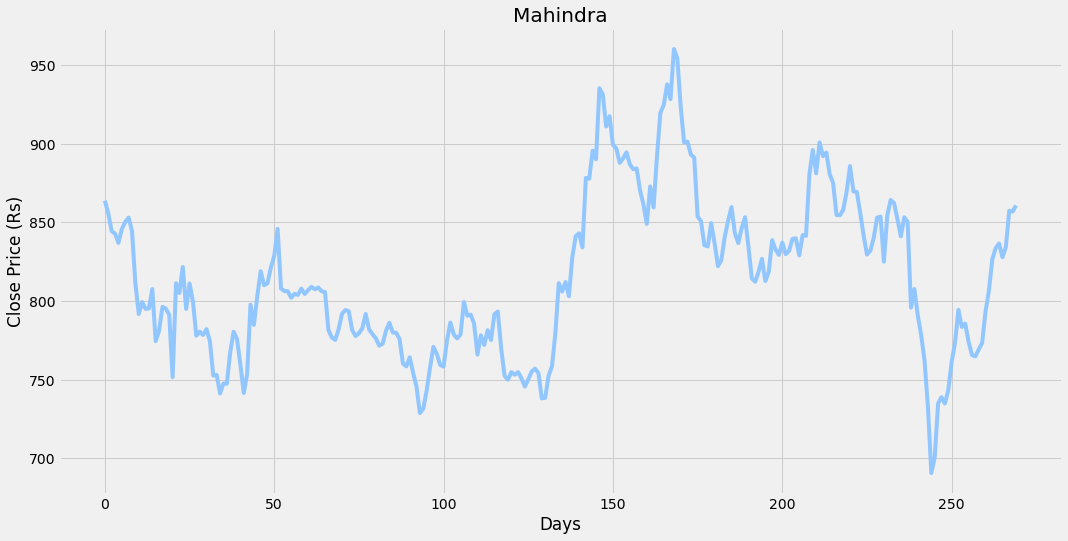

In [53]:
plt.figure(figsize=(16,8))
plt.title(company_name)
plt.xlabel("Days")
plt.ylabel("Close Price (Rs)")
plt.plot(mData['Close'])

In [54]:
cData = mData[['Close']]
cData.head()
# len(cData)

Close
0  863.80
1  855.80
2  844.40
3  842.85
4  836.95

In [55]:
import math
future_days = math.ceil(0.2*len(cData))
cData['Prediction'] = cData[['Close']].shift(-future_days)
cData.tail()

<ipython-input-55-3ebbaf6bb4d8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Close  Prediction
265  827.85         NaN
266  834.30         NaN
267  857.40         NaN
268  856.85         NaN
269  860.80         NaN

In [56]:
import numpy as np
X = np.array(cData.drop(['Prediction'],1))[:-future_days]
# X

In [57]:
Y = np.array(cData['Prediction'])[:-future_days]

In [58]:
# Y

In [59]:
from sklearn.model_selection import train_test_split
x_train,y_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [60]:
# x_train

In [61]:
x_future = cData.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [62]:
cData

Close  Prediction
0    863.80      806.20
1    855.80      802.05
2    844.40      804.60
3    842.85      803.85
4    836.95      807.85
..      ...         ...
265  827.85         NaN
266  834.30         NaN
267  857.40         NaN
268  856.85         NaN
269  860.80         NaN

[270 rows x 2 columns]

# Modeling

**Importing of libaries**

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
import math

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from keras.layers import Dense,LSTM

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Fitting of models**

In [64]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train,y_train)
lasso_reg = Lasso(normalize=True)
lasso_reg.fit(x_train,y_train)
knn = KNeighborsRegressor(n_neighbors=8)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform') 
knn.fit(x_train,y_train)
bay_ridge = BayesianRidge()
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False) 
bay_ridge.fit(x_train, y_train)
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
gbr.fit(x_train, y_train)
ada_reg = AdaBoostRegressor(n_estimators=100)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None) 

ada_reg.fit(x_train, y_train)



AdaBoostRegressor(n_estimators=100)

As regression problems use supervised data, we know Y_actual, and predictions will be considered accurate when Y_predicted is exactly equal to Y_actual. 

But, in regression problems, we have a continuous target variable. 

So, if we start evaluating our model on accuracy parameters, we will end up overfitting our model.

1. Mean Absolute Error (MAE)
2. Mean Absolute Percentage Error (MAPE)
3. Mean Squared Error (MSE)
4. R-Squared (R²)

## 1. Linear Regression

In [65]:
# x_future

In [66]:
lr_prediction = lr.predict(x_future)

<ipython-input-67-5a2937c48797>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.03986681467930442
MSE =  2231.0376341540446
MAPE =  0.04933341779201908
MAE =  38.66857922054107


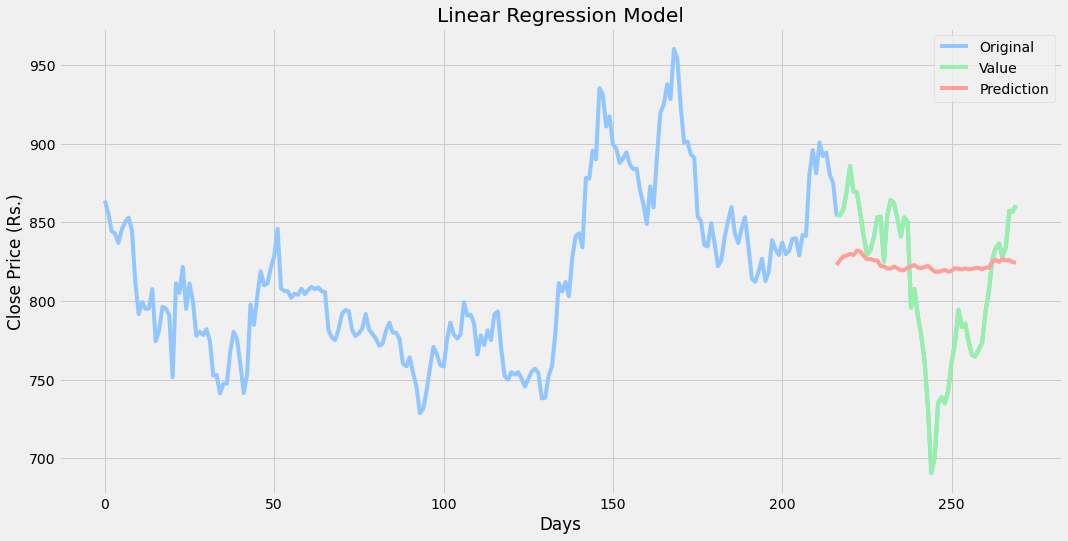

In [67]:
predictions = lr_prediction
valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Linear Regression Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_lr = mean_absolute_error(valid['Close'], predictions)
mape_lr = mean_absolute_percentage_error(valid['Close'], predictions)
mse_lr = mean_squared_error(valid['Close'], predictions)
r2_lr =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_lr)
print("MSE = ",mse_lr)
print("MAPE = ",mape_lr)
print("MAE = ",mae_lr)
plt.show()

## 2. Decision Tree

In [68]:
tree_prediction = tree.predict(x_future)
# tree_prediction

<ipython-input-69-2f3b31d9031b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.8038726905459382
MSE =  455.73615740740763
MAPE =  0.008762184003954163
MAE =  6.913888888888891


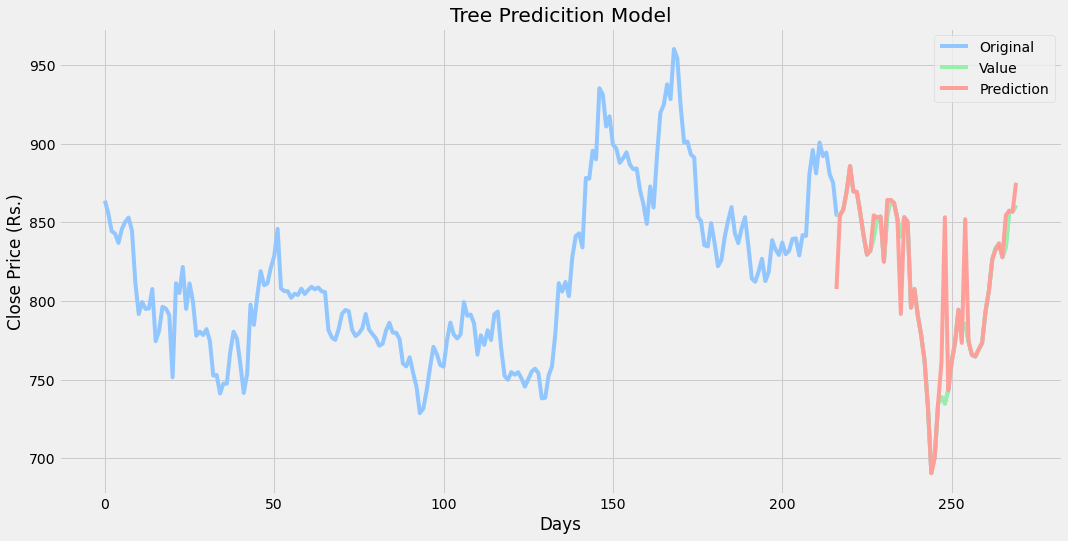

In [69]:
predictions = tree_prediction

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Tree Predicition Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_tree = mean_absolute_error(valid['Close'], predictions)
mape_tree = mean_absolute_percentage_error(valid['Close'], predictions)
mse_tree = mean_squared_error(valid['Close'], predictions)
r2_tree =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_tree)
print("MSE = ",mse_tree)
print("MAPE = ",mape_tree)
print("MAE = ",mae_tree)
plt.show()

## 3. Random Forest

<ipython-input-70-005276f630e3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.7610045877665225
MSE =  555.3477030428344
MAPE =  0.019003816261629045
MAE =  15.11887544532475


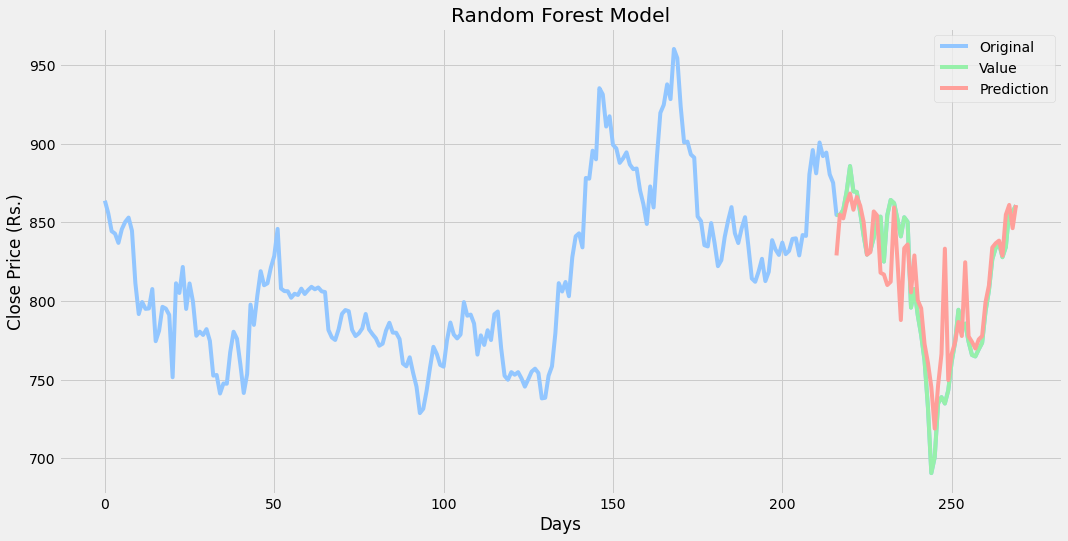

In [70]:
rf_prediction = rf.predict(x_future)
predictions = rf_prediction

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Random Forest Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_rf = mean_absolute_error(valid['Close'], predictions)
mape_rf = mean_absolute_percentage_error(valid['Close'], predictions)
mse_rf = mean_squared_error(valid['Close'], predictions)
r2_rf =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_rf)
print("MSE = ",mse_rf)
print("MAPE = ",mape_rf)
print("MAE = ",mae_rf)
plt.show()

## 4.SVR

<ipython-input-71-520acb76ff3a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.28136388584310856
MSE =  1669.876888393067
MAPE =  0.041757637349898694
MAE =  33.16983092820029


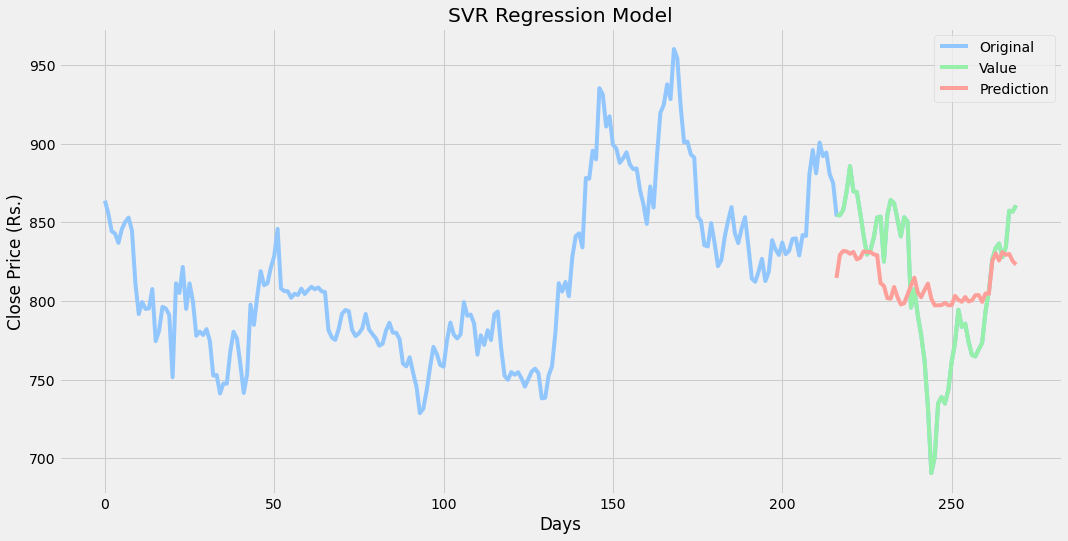

In [71]:
svr_pred = svr_reg.predict(x_future)
predictions = svr_pred

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("SVR Regression Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_svr = mean_absolute_error(valid['Close'], predictions)
mape_svr = mean_absolute_percentage_error(valid['Close'], predictions)
mse_svr = mean_squared_error(valid['Close'], predictions)
r2_svr =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_svr)
print("MSE = ",mse_svr)
print("MAPE = ",mape_svr)
print("MAE = ",mae_svr)
plt.show()

## 5.LSTM

In [72]:
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from keras.layers import Dense,LSTM
df = mData.copy(deep=True)
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
# training_data_len
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# scaled_data

train_data = scaled_data[0:training_data_len,:]
#Spliting 
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
#     if i<=61:
#         print(x_train)
#         print(y_train)
#         print()

#convert the x_train,y_train to numpy array
x_train,y_train = np.array(x_train),np.array(y_train)
# Reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
# x_train.shape

#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

# Create the testing dataset 
test_data = scaled_data[training_data_len-60:,:]

#Create the data sets x_test,y_test
x_test=[]
y_test = dataset[training_data_len,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

# Convert the data to numpy
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


156/156 [==============================] - 7s 24ms/step - loss: 0.0208


<ipython-input-73-de487be5cdcf>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.5056591524856635
MSE =  1148.6875485255846
MAPE =  0.032909802089549266
MAE =  25.95801934136284


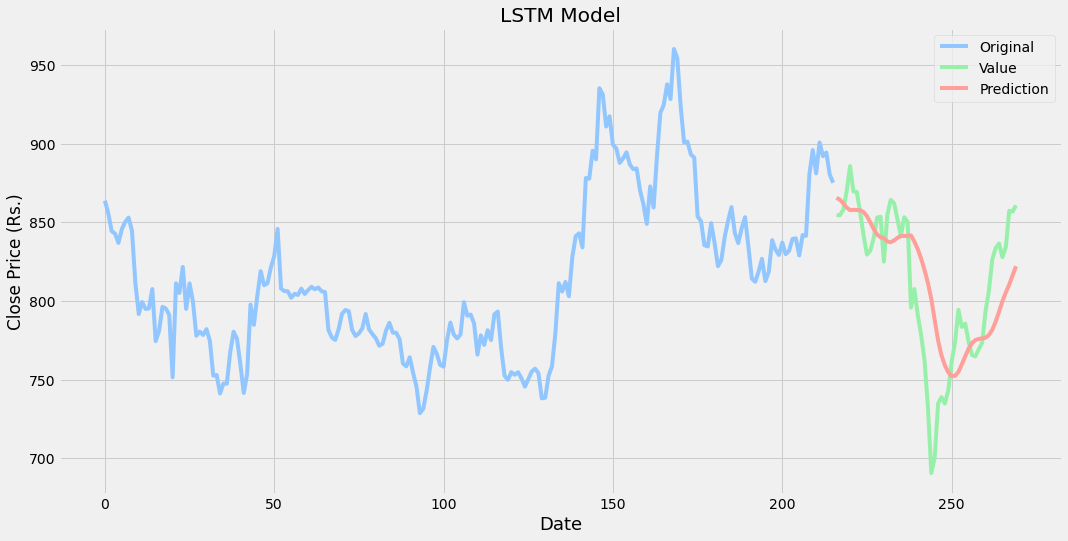

In [73]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("LSTM Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (Rs.)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_lstm = mean_absolute_error(valid['Close'], predictions)
mape_lstm = mean_absolute_percentage_error(valid['Close'], predictions)
mse_lstm = mean_squared_error(valid['Close'], predictions)
r2_lstm =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_lstm)
print("MSE = ",mse_lstm)
print("MAPE = ",mape_lstm)
print("MAE = ",mae_lstm)
plt.show()

## 6. Lasso 

<ipython-input-74-68b96e663a32>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  -0.020278843525197043
MSE =  2370.7966061766488
MAPE =  0.05245838343351156
MAE =  41.39200960219479


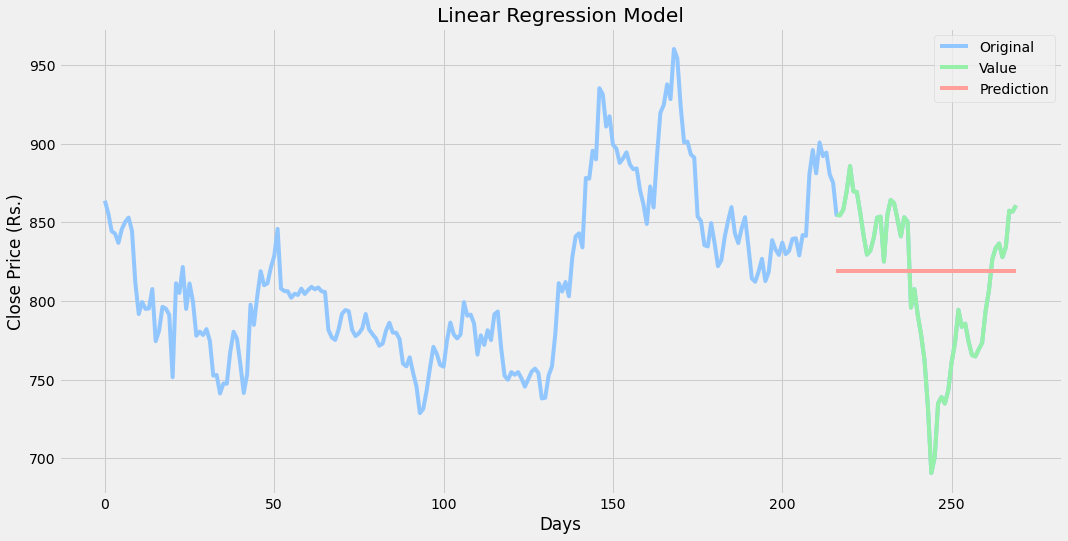

In [74]:
lasso_prediction =lasso_reg.predict(x_future)
predictions = lasso_prediction

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Linear Regression Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_lasso = mean_absolute_error(valid['Close'], predictions)
mape_lasso = mean_absolute_percentage_error(valid['Close'], predictions)
mse_lasso = mean_squared_error(valid['Close'], predictions)
r2_lasso =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_lasso)
print("MSE = ",mse_lasso)
print("MAPE = ",mape_lasso)
print("MAE = ",mae_lasso)
plt.show()
# negative R² can be,
# 1. Model is not learning the trend that is present in the train data.
# 2. Too little data has been used to evaluate the model compared to train data.
# 3. Too many outliers are present in the dataset.

## 7. KNN

<ipython-input-75-f8a0c0ad3e20>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.44530910194182904
MSE =  1288.9214619502322
MAPE =  0.03389293681683331
MAE =  26.91956018518518


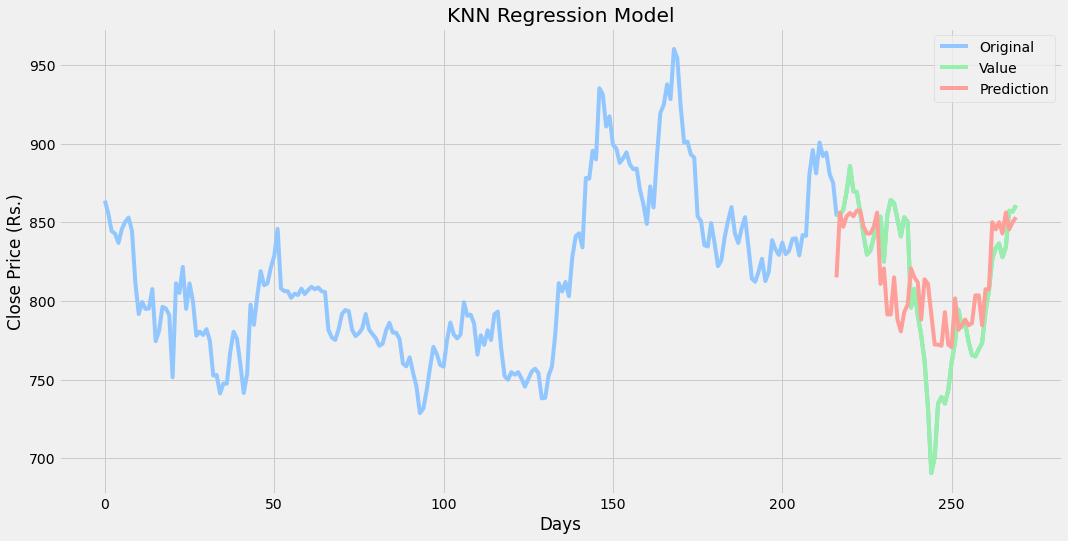

In [75]:
knn_pred = knn.predict(x_future)
predictions = knn_pred

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("KNN Regression Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_knn = mean_absolute_error(valid['Close'], predictions)
mape_knn = mean_absolute_percentage_error(valid['Close'], predictions)
mse_knn = mean_squared_error(valid['Close'], predictions)
r2_knn =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_knn)
print("MSE = ",mse_knn)
print("MAPE = ",mape_knn)
print("MAE = ",mae_knn)
plt.show()

## 8. Bayesian Ridge

<ipython-input-76-7fa1d60f75c0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  -0.0033778064206662073
MSE =  2331.524086058674
MAPE =  0.05169670817988926
MAE =  40.72820405530307


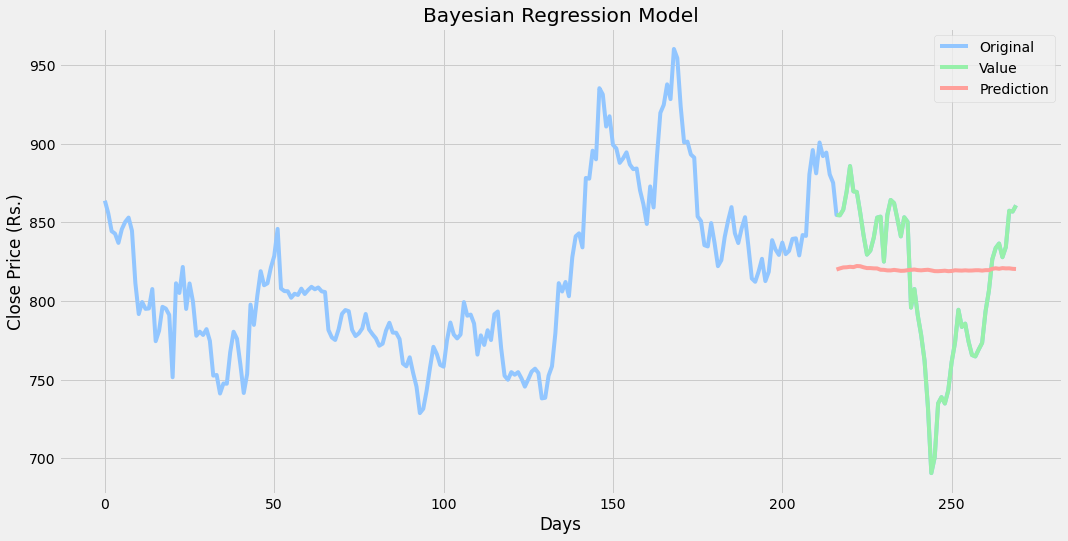

In [76]:
bar_pred = bay_ridge.predict(x_future)
predictions = bar_pred

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Bayesian Regression Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_bar = mean_absolute_error(valid['Close'], predictions)
mape_bar = mean_absolute_percentage_error(valid['Close'], predictions)
mse_bar = mean_squared_error(valid['Close'], predictions)
r2_bar =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_bar)
print("MSE = ",mse_bar)
print("MAPE = ",mape_bar)
print("MAE = ",mae_bar)
plt.show()

## 9. Gradient Boosting

<ipython-input-77-5f015695b84c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.8108050914641749
MSE =  439.62750958636184
MAPE =  0.01937990183110254
MAE =  15.426651170566288


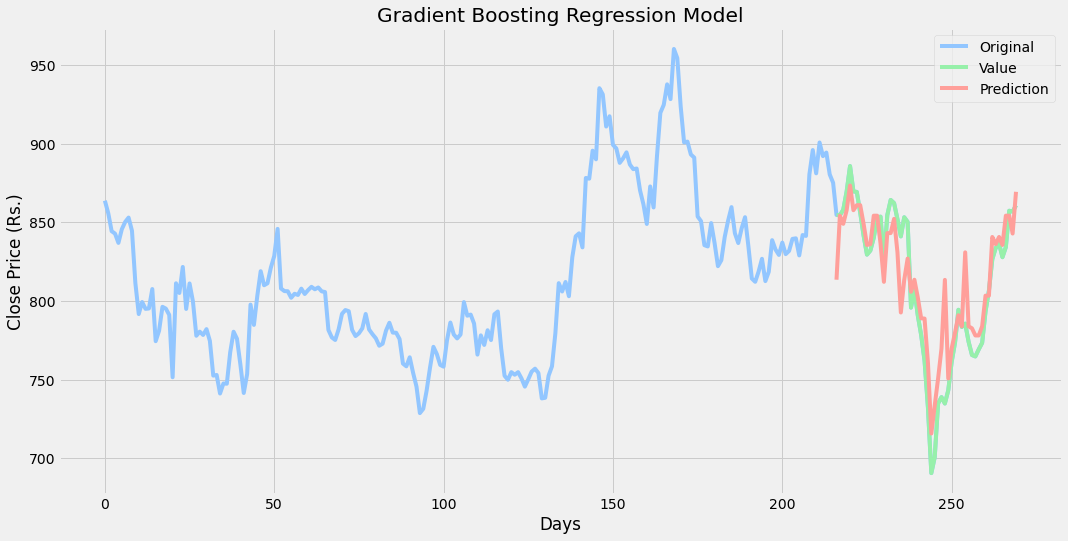

In [77]:
gbr_pred = gbr.predict(x_future)
predictions = gbr_pred

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Gradient Boosting Regression Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_gbr = mean_absolute_error(valid['Close'], predictions)
mape_gbr = mean_absolute_percentage_error(valid['Close'], predictions)
mse_gbr = mean_squared_error(valid['Close'], predictions)
r2_gbr =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_gbr)
print("MSE = ",mse_gbr)
print("MAPE = ",mape_gbr)
print("MAE = ",mae_gbr)
plt.show()

## 10. AdaBoost

<ipython-input-78-46aa31f3ba09>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



R_Squared =  0.4650044949655091
MSE =  1243.155766391435
MAPE =  0.03495879773160689
MAE =  27.64969701569114


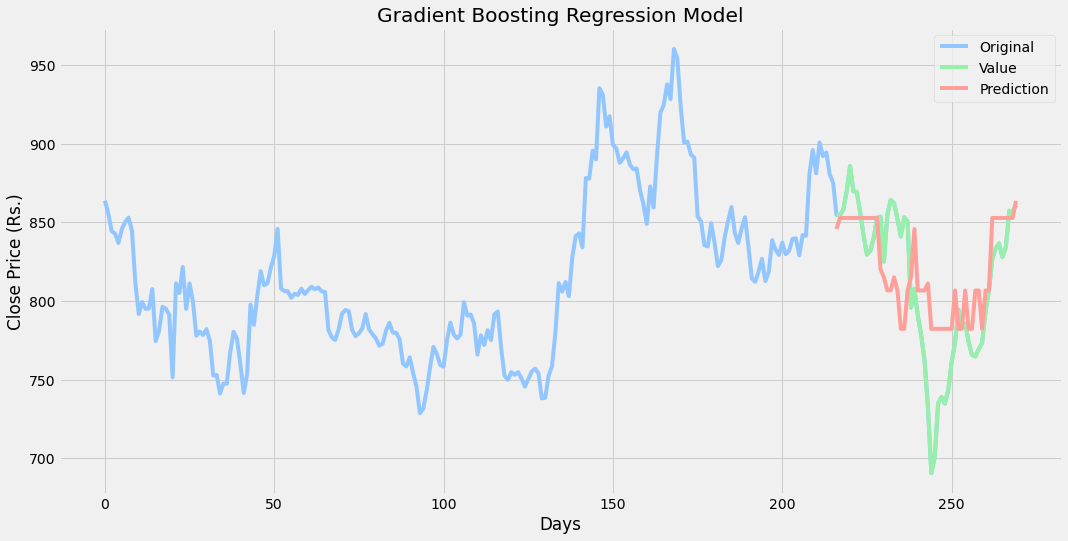

In [78]:

ada_pred = ada_reg.predict(x_future)
predictions = ada_pred

valid = cData[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Gradient Boosting Regression Model")
plt.xlabel("Days")
plt.ylabel("Close Price (Rs.)")
plt.plot(cData['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original','Value','Prediction'])
mae_ada = mean_absolute_error(valid['Close'], predictions)
mape_ada = mean_absolute_percentage_error(valid['Close'], predictions)
mse_ada = mean_squared_error(valid['Close'], predictions)
r2_ada =  r2_score(valid['Close'], predictions)
print("R_Squared = ",r2_ada)
print("MSE = ",mse_ada)
print("MAPE = ",mape_ada)
print("MAE = ",mae_ada)
plt.show()

Metrices Matrix

In [79]:
# pip install tabulate

In [80]:
from tabulate import tabulate

In [81]:
table = [['Model Name', 'R2 score', 'MSE','MAPE','MAE'], 
         ['Linear Regression', r2_lr, mse_lr,mape_lr,mae_lr],
         ['Decision Tree', r2_tree, mse_tree,mape_tree,mae_tree],
         ['Random Forest', r2_rf, mse_rf,mape_rf,mae_rf],
         ['SVR', r2_svr, mse_svr,mape_svr,mae_svr],
         ['LSTM', r2_lstm, mse_lstm,mape_lstm,mae_lstm],
         ['Lasso', r2_lasso, mse_lasso,mape_lasso,mae_lasso],
         ['KNN ', r2_knn, mse_knn,mape_knn,mae_knn],
         ['Bayesian Ridge', r2_bar, mse_bar,mape_bar,mae_bar],
         ['Gradient Boosting', r2_gbr, mse_gbr,mape_gbr,mae_gbr],
         ['Ada Boost', r2_ada, mse_ada,mape_ada,mae_ada],
         
         ]

In [82]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid',showindex=range(1,11)))

╒════╤═══════════════════╤═════════════╤══════════╤════════════╤══════════╕
│    │ Model Name        │    R2 score │      MSE │       MAPE │      MAE │
╞════╪═══════════════════╪═════════════╪══════════╪════════════╪══════════╡
│  1 │ Linear Regression │  0.0398668  │ 2231.04  │ 0.0493334  │ 38.6686  │
├────┼───────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  2 │ Decision Tree     │  0.803873   │  455.736 │ 0.00876218 │  6.91389 │
├────┼───────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  3 │ Random Forest     │  0.761005   │  555.348 │ 0.0190038  │ 15.1189  │
├────┼───────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  4 │ SVR               │  0.281364   │ 1669.88  │ 0.0417576  │ 33.1698  │
├────┼───────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  5 │ LSTM              │  0.505659   │ 1148.69  │ 0.0329098  │ 25.958   │
├────┼───────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  6 │ Lasso

Negative R² can be,
1. Model is not learning the trend that is present in the train data.
2. Too little data has been used to evaluate the model compared to train data.
3. Too many outliers are present in the dataset.